In [71]:
##Instalar solo una vez
#install.packages("modeest")
install.packages("psych")

also installing the dependencies ‘tmvnsim’, ‘mnormt’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [70]:
library(readr)
library(dplyr)
library(modeest)
#library(e1071)
library(ggplot2)
library(corrplot)

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


In [47]:
dataset <- read_delim("./dataset.csv",";", escape_double = FALSE, trim_ws = TRUE)
str(dataset)
#head(dataset)

Parsed with column specification:
cols(
  Comunidad = col_character(),
  Ciudad = col_character(),
  `Cantidad de perfiles facebook` = col_double(),
  `Tasa desempleo ciudad` = col_double(),
  `% Población sedentaria` = col_double(),
  `Salario medio por hora` = col_double(),
  `Parques m2/hab` = col_double(),
  `Usuarios jóvenes (18-39)` = col_double(),
  `Usuarios adultos (40-64)` = col_double(),
  `Usuarios mayores (+ 65)` = col_double(),
  Hombres = col_double(),
  Mujeres = col_double(),
  Población = col_double()
)


tibble [50 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Comunidad                    : chr [1:50] "Castilla-La Mancha" "Comunidad de Madrid" "Comunidad de Madrid" "Comunidad Valenciana" ...
 $ Ciudad                       : chr [1:50] "Albacete" "Alcalá de Henares" "Alcorcón" "Alicante" ...
 $ Cantidad de perfiles facebook: num [1:50] 63.6 49 55.5 87.5 101.6 ...
 $ Tasa desempleo ciudad        : num [1:50] 20.7 10.2 10.2 15 19.7 ...
 $ % Población sedentaria       : num [1:50] 43.2 34.5 34.5 37.3 39.2 ...
 $ Salario medio por hora       : num [1:50] 14.1 17.1 17.1 14.4 14.5 ...
 $ Parques m2/hab               : num [1:50] 7.16 11.2 7.8 6.12 6.5 6.75 6.55 5.53 5.73 2.8 ...
 $ Usuarios jóvenes (18-39)     : num [1:50] 29.5 21.2 21.8 39.2 50.3 ...
 $ Usuarios adultos (40-64)     : num [1:50] 28.9 23.7 27.7 42.2 45.7 ...
 $ Usuarios mayores (+ 65)      : num [1:50] 3.81 3.46 5.9 7.54 6.1 5.31 5.05 8.64 5.21 3.3 ...
 $ Hombres                      : num [1:50] 30.1 22.7 24.8 39.2 47.8 .

In [48]:
colnames(dataset)

[1] "Comunidad"                     "Ciudad"                       
 [3] "Cantidad de perfiles facebook" "Tasa desempleo ciudad"        
 [5] "% Población sedentaria"        "Salario medio por hora"       
 [7] "Parques m2/hab"                "Usuarios jóvenes (18-39)"     
 [9] "Usuarios adultos (40-64)"      "Usuarios mayores (+ 65)"      
[11] "Hombres"                       "Mujeres"                      
[13] "Población"

In [49]:
#Reducir el número de columnas a las que se van a utilizar
dataset<- dataset %>% 
          select('Ciudad','Cantidad de perfiles facebook','Tasa desempleo ciudad','% Población sedentaria','Hombres','Mujeres')


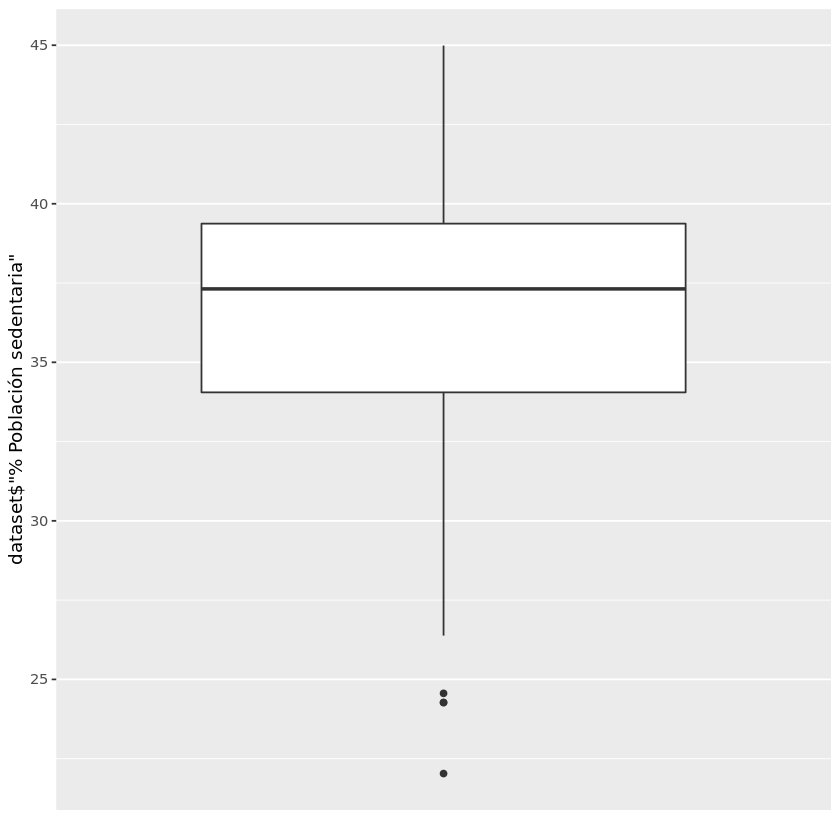

In [63]:
ggplot(dataset, aes(x=factor(0),y=dataset$'% Población sedentaria'))+geom_boxplot()+xlab("")+scale_x_discrete(breaks=NULL)

In [69]:
desMean <- mean(dataset$'Tasa desempleo ciudad')
print(desMean)
desVar <- var(dataset$'Tasa desempleo ciudad')
print(desVar)
desMed <- median(dataset$'Tasa desempleo ciudad')
print(desMed)
desMod <- mfv(dataset$'Tasa desempleo ciudad')
print(desMod)
desMin <- min(dataset$'Tasa desempleo ciudad')
print(desMin)
desMax <- max(dataset$'Tasa desempleo ciudad')
print(desMax)
desRango <- IQR(dataset$'Tasa desempleo ciudad')
print(desRango)

#skew(CEP$satisfaccion_vida) Kurtosis

desQuant <- quantile(dataset$'Tasa desempleo ciudad', probs = seq(0, 1, 0.25), na.rm = FALSE,
         names = TRUE, type = 7)
print(desQuant)

correlacion<-corrplot(dataset)


#tabla<-cbind(desMean,desVar,desMed,desMod)
#print(tabla)

[1] 14.0182
[1] 20.63262
[1] 12.955
[1] 10.5
[1] 6.91
[1] 24.89
[1] 7.5075
     0%     25%     50%     75%    100% 
 6.9100 10.5000 12.9550 18.0075 24.8900 


ERROR: Error in corrplot(dataset): could not find function "corrplot"


In [ ]:
desKurt <- kurtosis(dataset)
print(desKurt)

In [52]:
sedMean <- mean(dataset$'% Población sedentaria')
print(sedMean)
sedVar <- var(dataset$'% Población sedentaria')
print(sedVar)
sedMed <- median(dataset$'% Población sedentaria')
print(sedMed)
sedMod <- mfv(dataset$'% Población sedentaria')
print(sedMod)

sedMin <- min(dataset$'% Población sedentaria')
print(sedMin)
sedMax <- max(dataset$'% Población sedentaria')
print(sedMax)
sedRango <- IQR(dataset$'% Población sedentaria')
print(sedRango)

sedQuant <- quantile(dataset$'% Población sedentaria', probs = seq(0, 1, 0.25), na.rm = FALSE,
         names = TRUE, type = 7)
print(sedQuant)


[1] 35.6366
[1] 31.28248
[1] 37.315
[1] 37.35
[1] 22.03
[1] 44.99
[1] 5.32
     0%     25%     50%     75%    100% 
22.0300 34.0525 37.3150 39.3725 44.9900 
